In [1]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

colors = ['#9ACBCB', '#2F2F31', '#B8A7D6', '#FFF39D', '#3296FF', '#F5A445']

In [2]:
input_csv = '../../data/mock/wog_overview_level3_FY-ALL.csv'
df = pd.read_csv(input_csv)

In [3]:
print(df)

                 Service Classification  Sum of Total Financial Year
0                      Accounts Payable       1100000        2014-15
1                      Accounts Payable       1000000        2015-16
2                   Accounts Receivable        520000        2014-15
3                   Accounts Receivable        530000        2015-16
4                      Asset Management        200000        2014-15
5                      Asset Management        210000        2015-16
6                             Budgeting       2600000        2014-15
7                             Budgeting       3300000        2015-16
8   Contract Management and Procurement       1900000        2014-15
9   Contract Management and Procurement       1850000        2015-16
10               Credit Card Management        420000        2014-15
11               Credit Card Management        450000        2015-16
12          Financial Policy and Advice        420000        2014-15
13          Financial Policy and A

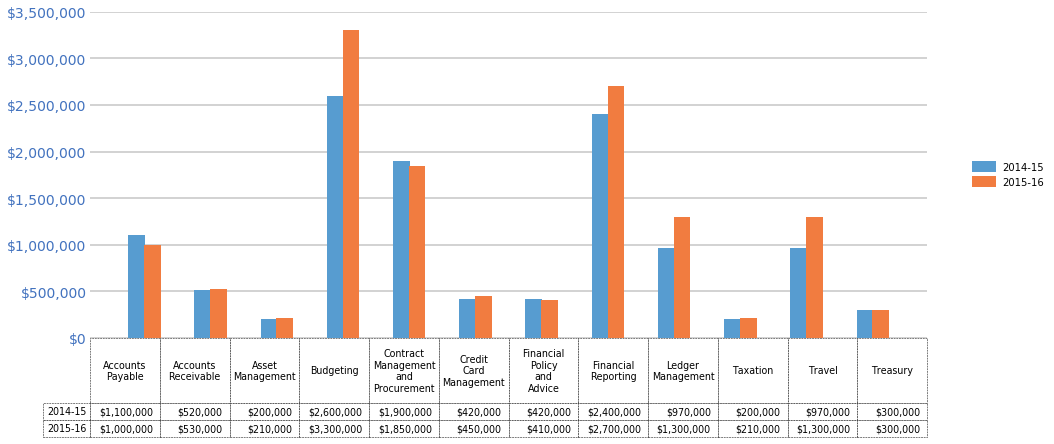

In [4]:
# Initialize figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)

pos = range(len(df[df['Financial Year'] == '2015-16']))
width = 0.25

group1 = df[df['Financial Year'] == '2014-15']['Sum of Total']
group2 = df[df['Financial Year'] == '2015-16']['Sum of Total']

ax.bar([x - 0.12 for x in pos], group1, color='#579cd0', width=width, zorder=2)
ax.bar([x + 0.12 for x in pos], group2, color='#f17c40', width=width, zorder=2)

# Set chart properties and formatting
fig.set_size_inches(15,6)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: '${:,.0f}'.format(x)))
ax.tick_params(axis='y', which='major', labelsize=14, labelcolor='#4373bf', length=0)
ax.tick_params(axis='x', which='major', labelsize=9.5, length=0)

xlabels = df['Service classification'].unique()
xlabels = [x.replace(' ', '\n') for x in xlabels]
ax.set_xticklabels([], position=(0,-0.04), clip_on=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.grid(color='lightgray', linewidth=2)

# Draw the legend
patch1 = mpatches.Patch(color='#579cd0', label='2014-15', linewidth=4)
patch2 = mpatches.Patch(color='#f17c40', label='2015-16', linewidth=4)
ax.legend(handles=[patch1, patch2], frameon=False, loc='center right', bbox_to_anchor=(1.15, 0.5))
ax.set_ylim(0, 3500000)

# Data table
df2 = pd.DataFrame([], columns=xlabels)
df2.loc['2014-15'] = df[df['Financial Year'] == '2014-15']['Sum of Total'].map('${:,.0f}'.format).values
df2.loc['2015-16'] = df[df['Financial Year'] == '2015-16']['Sum of Total'].map('${:,.0f}'.format).values
data_table = ax.table(cellText=df2.as_matrix(), colLabels=xlabels, rowLabels=['2014-15', '2015-16'], loc='bottom')
data_table.auto_set_font_size(False) 
data_table.set_fontsize(9.5)

# Adjust cell heights
data_table.scale(1,1.4)
cells = data_table.get_celld()
for x,y in cells:
    cell = cells[(x,y)]
    if x == 0:
        cell.set_height(0.2)
    cell.set_linewidth(0.5)
    cell.set_linestyle('dashed')
    
# Write to a file
fig.savefig('../../reports/figures/mock/wog_overview_level3_FY-ALL.pdf', bbox_inches='tight')